In [217]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 준비 (Data Preparation)
# 실제로는 더 복잡한 데이터셋을 사용합니다.
# 여기서는 간단한 선형 관계를 가진 데이터를 만듭니다.
X_train = np.array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float)
y_train = np.array([1., 3., 5., 7., 9., 11., 13., 15., 17., 19.], dtype=float) # y = 2x + 1

In [181]:
# 2. 모델 정의 (Model Definition)
# Keras의 Sequential API를 사용하여 간단한 선형 모델을 만듭니다.
# Dense 층은 각 입력과 출력이 모두 연결된 층을 의미합니다.
# units=1은 출력 뉴런이 1개라는 의미입니다.
# input_shape=[1]은 입력 데이터의 형태가 1차원 배열이라는 의미입니다.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [183]:
# 3. 컴파일 (Compile)
# 컴파일 과정은 모델이 fit() 메서드를 통해 본격적인 학습을 시작하기 전에 필요한 모든 "설계도"와 "도구"를 준비하는 단계입니다.
# optimizer: 경사 하강법 알고리즘을 지정합니다. 'adam'은 가장 일반적으로 사용되는 옵티마이저 중 하나입니다.
# loss: 모델이 예측한 값과 실제 값 사이의 오차를 계산하는 함수입니다.
#       'mean_squared_error'는 회귀 문제에서 주로 사용됩니다.
model.compile(optimizer='adam', loss='mean_squared_error')

모델 학습 시작...
모델 학습 완료!


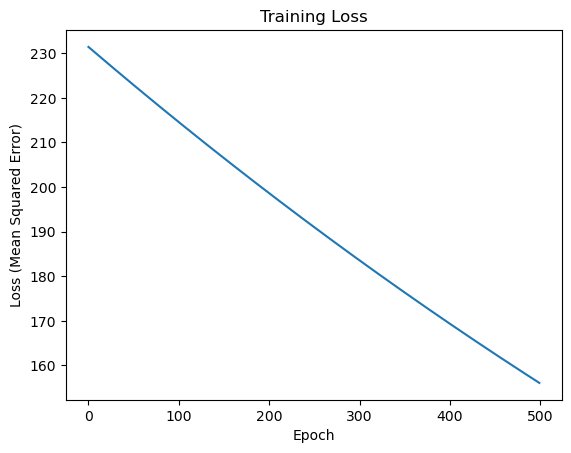

In [193]:
# 4. 학습 (Train/Fit)
# epochs: 전체 데이터셋을 몇 번 반복하여 학습할 것인지 지정합니다.
# verbose: 학습 과정의 출력 수준을 지정합니다. 0: 아무것도 출력 안함, 1: 진행 막대와 로그, 2: 각 에포크마다 한 줄 출력
print("모델 학습 시작...")
history = model.fit(X_train, y_train, epochs=500, verbose=0)
print("모델 학습 완료!")

# 학습 과정에서 손실(loss) 변화를 시각화
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Training Loss')
plt.show()

In [195]:
# 5. 평가 (Evaluate) - 이 예시에서는 훈련 데이터만 사용했으므로, 훈련 데이터에 대한 평가입니다.
# 실제로는 별도의 검증/테스트 데이터셋으로 평가합니다.
loss = model.evaluate(X_train, y_train, verbose=1)
print(f"훈련 데이터에 대한 최종 손실: {loss:.4f}")

1/1 [==============================] - 0s 11ms/step - loss: 155.9392
훈련 데이터에 대한 최종 손실: 155.9392


In [207]:
# 6. 예측 (Predict)
# 새로운 데이터에 대해 예측을 수행합니다.
new_X = np.array([10., 15., 20.], dtype=float)
predictions = model.predict(new_X)

print("\n새로운 데이터에 대한 예측:")
for x, y_pred in zip(new_X, predictions):
    print(f"입력 x: {x:.2f}, 예측 y: {y_pred[0]:.2f}")

# 학습된 모델의 가중치 확인 (선형 회귀의 경우 기울기와 절편)
print(f"\n학습된 가중치 (기울기): {model.get_weights()[0][0][0]:.2f}")
print(f"학습된 가중치 (절편): {model.get_weights()[1][0]:.2f}")
# print(f"{model.get_weights()[0][0]}")
# print(f"{model.get_weights()[1][0]}")

1/1 [==============================] - 0s 9ms/step

새로운 데이터에 대한 예측:
입력 x: 10.00, 예측 y: -2.34
입력 x: 15.00, 예측 y: -3.98
입력 x: 20.00, 예측 y: -5.61

학습된 가중치 (기울기): -0.33
학습된 가중치 (절편): 0.92


혹시 아래 내용을 개발해줄 수 있는지 확인해줘.
1)파이썬으로 테스트 api 개발(GET방식 /test)
2)모델이 10초마다 해당 api를 호출해서 response 받기까지 걸린 시간을 '실시간'으로 '학습'
3)간단한 화면을 만들어서 현재 모델이 학습된 데이터 구간을 보여주는데 input 박스를 만들어서 범위를 벗어나면(=이상치 감지) '비정상 데이터'라고 알려주는거 